<a href="https://colab.research.google.com/github/mitultandonn/urbancoolingproject/blob/main/Urban_Cooling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Excel sheet with real data to stimulate data for clothing factor and Activity Level

For this project, I focused on Penrith, a suburb in Western Sydney known to be prone to urban heat risks. To ensure contextual relevance and data accuracy, I sourced all datasets specifically from official sources covering the Penrith region.

Daily Maximum Temperature: I retrieved data from the Bureau of Meteorology (BoM), Australia, covering the period from January 1, 2025, to March 31, 2025.
Air Quality and Atmospheric Data: I accessed OpenAQ, which directed me to the Knapsack area of Penrith, where an air quality monitoring station is located. I collected data on PM2.5, temperature, and relative humidity (RH) for the same time frame (January–March 2025).

Building Density: Data on dwelling structures in the Penrith region was obtained from the 2021 census data, providing insight into the built environment and building density patterns in the area.

Population Density: I extracted population distribution and density data for Penrith from the Australian Census, which allowed for an understanding of the human-centric factors contributing to urban heat vulnerability.



## Clothing Factor & Activity Level Calculation

This section explains how human-related features—Clothing Factor and Activity Level—were derived based on environmental conditions to support the Penrith Urban Cooling study.

### Source Data

The dataset was sourced from an Excel file:
`penrith_urban_cooling.xlsx`
It contains environmental attributes such as Temperature (°C), Relative Humidity (RH%), and Air Quality (PM2.5 µg/m³) from January to March 2025.




## Clothing Factor

The Clothing Factor simulates how environmental conditions influence clothing choices, which in turn affect human thermal comfort and heat stress.

### Logic:

* Based on Temperature:

  * ≤ 15°C → Factor = 5 (heavier clothing)
  * 15–20°C → Factor = 4
  * 20–25°C → Factor = 3
  * 25–30°C → Factor = 2
  * > 30°C → Factor = 1 (light clothing)

* Adjusted by Relative Humidity (RH):

  * If RH > 70%, discomfort from moisture may prompt lighter clothing: Factor - 0.5
  * If RH < 40%, drier air may lead to more clothing: Factor + 0.5

The final value is rounded to 1 decimal place.

### Purpose:

This factor captures human adaptability to climate conditions, critical for modeling personalized urban cooling strategies.




## Activity Level

The Activity Level reflects likely human activity intensity based on thermal and air quality conditions, which influence heat exposure risk.

### Logic:

* Based on Temperature:

  * < 10°C or > 40°C → Level = 1 (very low activity)
  * 10–18°C → Level = 2
  * 18–25°C → Level = 4
  * 25–32°C → Level = 5 (peak activity range)
  * 32–40°C → Level = 3 (moderate reduction in activity)

* Adjusted by PM2.5 Air Quality:

  * PM2.5 ≥ 3 µg/m³ → Poor air = Level - 1 (reduced outdoor activity)
  * PM2.5 ≤ 1 µg/m³ → Very clean air = Level + 1 (encouraged activity)

The value is constrained between 1 and 5 to maintain valid activity levels.

### Purpose:

The activity level helps model real-world human behavior in heat-prone areas, considering both temperature stress and air quality hazards.




## Output

Two new columns were added to the dataset:

* "Clothing Factor"
* "Activity Level"

Final outputs were saved as:

* `updated_data_with_factors.xlsx`
* `updated_data_with_factors.csv`




In [ ]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("/content/drive/MyDrive/penrith_urban_cooling.xlsx")  # Replace with your actual file name

def calculate_clothing_factor(temp, rh):
    # Base clothing factor based on temperature
    if temp <= 15:
        cf = 5
    elif temp <= 20:
        cf = 4
    elif temp <= 25:
        cf = 3
    elif temp <= 30:
        cf = 2
    else:
        cf = 1

    # Humidity adjustment
    if rh > 70 and cf > 1:
        cf -= 0.5
    elif rh < 40 and cf < 5:
        cf += 0.5
    return round(cf, 1)

def calculate_activity_level(temp, pm):
    # Base activity level based on temperature
    if temp < 10 or temp > 40:
        al = 1
    elif temp <= 18:
        al = 2
    elif temp <= 25:
        al = 4
    elif temp <= 32:
        al = 5
    else:  # 32–40
        al = 3

    # PM2.5 adjustment
    if pm >= 3:
        al = max(1, al - 1)
    elif pm <= 1:
        al = min(5, al + 1)
    return al

# Apply the functions to your dataframe
df["Clothing Factor"] = df.apply(lambda row: calculate_clothing_factor(row["Temperature"], row["RH"]), axis=1)
df["Activity Level"] = df.apply(lambda row: calculate_activity_level(row["Temperature"], row["Air Quality PM2.5"]), axis=1)

# Save to a new Excel file
df.to_excel("updated_data_with_factors.xlsx", index=False)
df.to_csv("updated_data_with_factors.csv", index=False)

In [ ]:
df.head()

,Date,Location,Daily Max Temperature,Air Quality PM2.5,RH,Temperature,Building Density,Population Density,Latitude,Longitude,Clothing Factor,Activity Level
0,2025-01-01,Penrith,36.3,1.259417,69.452250,18.726667,368903.5,12093,-33.751195,150.694171,4.0,4
1,2025-01-02,Penrith,22.8,2.133722,67.827335,18.770334,368903.5,12093,-33.751195,150.694171,4.0,4
2,2025-01-03,Penrith,28.7,1.988917,69.781708,18.753084,368903.5,12093,-33.751195,150.694171,4.0,4
3,2025-01-04,Penrith,34.4,2.502958,70.295584,19.511625,368903.5,12093,-33.751195,150.694171,3.5,4
4,2025-01-05,Penrith,38.3,3.428625,69.263624,21.494167,368903.5,12093,-33.751195,150.694171,3.0,3




## Human-Centric Urban Heat Risk Analysis – Discomfort Index Experiment

This experiment explores the influence of human factors—clothing preferences and physical activity—on urban heat discomfort in Penrith. Using environmental features, three versions of the **Discomfort Index (DI)** were calculated, followed by a refined **Urban Heat Risk** model using only human-centric features.




## Step 1: Load and Prepare the Dataset

* The dataset (`penrith_urban_cooling.xlsx`) was loaded into a DataFrame.
* Whitespace in column names was removed.
* Any existing “Urban Heat Risk” column was dropped to recalculate from scratch.




## Step 2: Calculate Clothing Factor

### Based on Temperature:

* ≤ 15°C → 5 (heavy clothing)
* 15–20°C → 4
* 20–25°C → 3
* 25–30°C → 2
* more than30°C → 1 (light clothing)

### Adjusted by Relative Humidity (RH):

* RH > 70% → discomfort due to humidity → clothing factor decreased by 0.5
* RH < 40% → drier conditions → clothing factor increased by 0.5

This models how people might adjust clothing in varying thermal conditions.




## Step 3: Calculate Activity Level

### Based on Temperature:

* < 10°C or > 40°C → 1 (low activity)
* 10–18°C → 2
* 18–25°C → 4
* 25–32°C → 5 (optimal range)
* 32–40°C → 3

### Adjusted by PM2.5 Air Quality:

* PM2.5 ≥ 3 µg/m³ → activity level reduced by 1
* PM2.5 ≤ 1 µg/m³ → activity level increased by 1

This models changes in human behavior under different air quality and temperature conditions.




## Step 4: Discomfort Index (DI) Variants

Three discomfort indices were computed using different feature weightings to assess how various environmental and human factors influence discomfort.

### DI\_1:

* 30% Temperature
* 20% RH
* 10% Air Quality (PM2.5)
* 10% Population Density
* 10% Building Density
* -10% Clothing Factor (inverse effect)
* 10% Activity Level

### DI\_2:

* 25% Temperature
* 15% RH
* 15% PM2.5
* 15% Population Density
* 5% Building Density
* -5% Clothing Factor
* 20% Activity Level

### DI\_3:

* 35% Temperature
* 10% RH
* 5% PM2.5
* 20% Population Density
* 10% Building Density
* -15% Clothing Factor
* 5% Activity Level

These indices allow comparative evaluation of how different weight distributions influence discomfort levels.




## Step 5: Urban Heat Risk (Human Factors Only)

A separate human-focused model was created using only **Clothing Factor** and **Activity Level**.

### Composite Score:

* 60% Clothing Factor
* 40% Activity Level

This was normalized using `MinMaxScaler` to obtain a **Urban Heat Risk** value between 0 and 1.

### Risk Classification:

* **Low**: < 0.33
* **Medium**: 0.33–0.66
* **High**: > 0.66




## Step 6: Save the Results

The final dataset was saved as:

```
urban_cooling_with_human_factors_only.csv
```

This CSV contains:

* Clothing Factor
* Activity Level
* Three Discomfort Indices
* Urban Heat Risk Score
* Risk Classification Label


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your Excel file
file_path = "/content/drive/MyDrive/penrith_urban_cooling.xlsx"  # update as needed
df = pd.read_excel(file_path)

# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Drop Urban Heat Risk if it exists
if "Urban Heat Risk" in df.columns:
    df = df.drop(columns=["Urban Heat Risk"])

# Calculate Clothing Factor based on Temperature
def calculate_clothing_factor(temp):
    if temp <= 15:
        return 5
    elif 15 < temp <= 20:
        return 4
    elif 20 < temp <= 25:
        return 3
    elif 25 < temp <= 30:
        return 2
    else:
        return 1

df["Clothing Factor"] = df["Temperature"].apply(calculate_clothing_factor)

# Adjust Clothing Factor by RH
def adjust_clothing_factor(row):
    cf = row["Clothing Factor"]
    rh = row["RH"]
    if rh > 70 and cf > 1:
        cf -= 0.5
    elif rh < 40 and cf < 5:
        cf += 0.5
    return cf

df["Clothing Factor"] = df.apply(adjust_clothing_factor, axis=1)

# Calculate Activity Level based on Temperature
def calculate_activity_level(temp):
    if temp < 10 or temp > 40:
        return 1
    elif 10 <= temp < 18:
        return 2
    elif 18 <= temp < 25:
        return 4
    elif 25 <= temp < 32:
        return 5
    else:
        return 3

df["Activity Level"] = df["Temperature"].apply(calculate_activity_level)

# Adjust Activity Level by PM2.5
def adjust_activity_level(row):
    al = row["Activity Level"]
    pm25 = row["Air Quality PM2.5"]
    if pm25 >= 3:
        al = max(1, al - 1)
    elif pm25 <= 1:
        al = min(5, al + 1)
    return al

df["Activity Level"] = df.apply(adjust_activity_level, axis=1)

# Keep original DI calculations for reference (optional)
df["DI_1"] = (
    0.3 * df["Temperature"] +
    0.2 * df["RH"] +
    0.1 * df["Air Quality PM2.5"] +
    0.1 * df["Population Density"] +
    0.1 * df["Building Density"] -
    0.1 * df["Clothing Factor"] +
    0.1 * df["Activity Level"]
)

df["DI_2"] = (
    0.25 * df["Temperature"] +
    0.15 * df["RH"] +
    0.15 * df["Air Quality PM2.5"] +
    0.15 * df["Population Density"] +
    0.05 * df["Building Density"] -
    0.05 * df["Clothing Factor"] +
    0.2 * df["Activity Level"]
)

df["DI_3"] = (
    0.35 * df["Temperature"] +
    0.1 * df["RH"] +
    0.05 * df["Air Quality PM2.5"] +
    0.2 * df["Population Density"] +
    0.1 * df["Building Density"] -
    0.15 * df["Clothing Factor"] +
    0.05 * df["Activity Level"]
)

# *** New Urban Heat Risk calculation based only on Clothing Factor and Activity Level ***
# We create a composite score and scale it

df["Urban Heat Risk Composite"] = (
    0.6 * df["Clothing Factor"] +
    0.4 * df["Activity Level"]
)

scaler = MinMaxScaler()
df["Urban Heat Risk"] = scaler.fit_transform(df[["Urban Heat Risk Composite"]])

# Classify Urban Heat Risk into Low, Medium, High
def classify_risk(val):
    if val < 0.33:
        return "Low"
    elif val < 0.66:
        return "Medium"
    else:
        return "High"

df["Risk Class"] = df["Urban Heat Risk"].apply(classify_risk)

# Save to CSV
output_csv_path = "urban_cooling_with_human_factors_only.csv"
df.to_csv(output_csv_path, index=False)
print(f"Saved processed data with human-factor-based urban heat risk to {output_csv_path}")

Saved processed data with human-factor-based urban heat risk to urban_cooling_with_human_factors_only.csv


In [ ]:
df.head()

,Date,Location,Daily Max Temperature,Air Quality PM2.5,RH,Temperature,Building Density,Population Density,Latitude,Longitude,Clothing Factor,Activity Level,DI_1,DI_2,DI_3,Urban Heat Risk Composite,Urban Heat Risk,Risk Class
0,2025-01-01,Penrith,36.3,1.259417,69.452250,18.726667,368903.5,12093,-33.751195,150.694171,4.0,4,38119.284392,20275.013417,39322.112529,4.0,1.000000,High
1,2025-01-02,Penrith,22.8,2.133722,67.827335,18.770334,368903.5,12093,-33.751195,150.694171,4.0,4,38119.059939,20274.911742,39322.009036,4.0,1.000000,High
2,2025-01-03,Penrith,28.7,1.988917,69.781708,18.753084,368903.5,12093,-33.751195,150.694171,4.0,4,38119.431158,20275.178865,39322.191196,4.0,1.000000,High
3,2025-01-04,Penrith,34.4,2.502958,70.295584,19.511625,368903.5,12093,-33.751195,150.694171,3.5,4,38119.862900,20275.547688,39322.608775,3.7,0.833333,High
4,2025-01-05,Penrith,38.3,3.428625,69.263624,21.494167,368903.5,12093,-33.751195,150.694171,3.0,3,38120.293837,20275.852379,39323.270752,3.0,0.444444,Medium


#**Splitting the dataset into 80-20 Train/Test split**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:

              precision    recall  f1-score   support

        High       0.86      1.00      0.92         6
         Low       1.00      0.67      0.80         3
      Medium       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.92      0.85      0.87        18
weighted avg       0.90      0.89      0.89        18



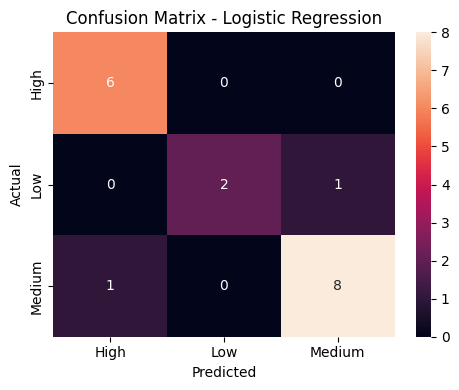


Random Forest:

              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         3
      Medium       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.97      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18



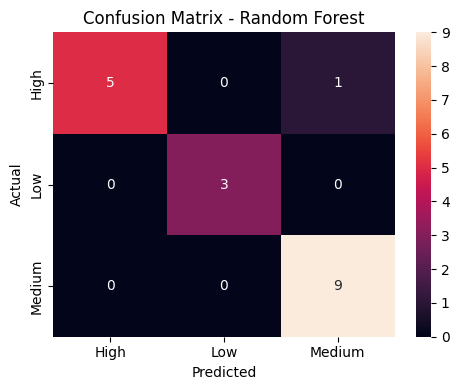


Support Vector Machine:

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         6
         Low       0.00      0.00      0.00         3
      Medium       0.50      1.00      0.67         9

    accuracy                           0.50        18
   macro avg       0.17      0.33      0.22        18
weighted avg       0.25      0.50      0.33        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


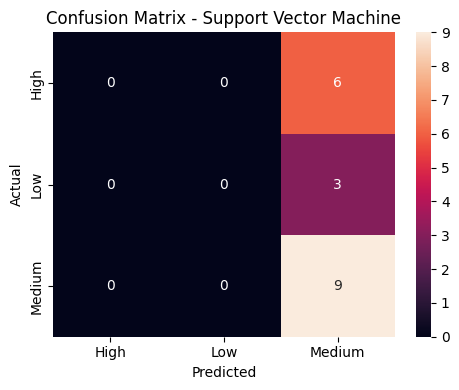


K-Nearest Neighbors:

              precision    recall  f1-score   support

        High       0.83      0.83      0.83         6
         Low       1.00      1.00      1.00         3
      Medium       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.91      0.91      0.91        18
weighted avg       0.89      0.89      0.89        18



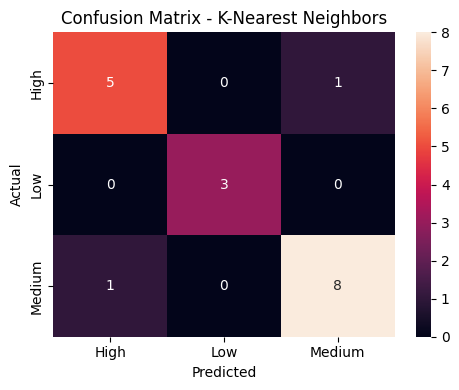


Naive Bayes:

              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         3
      Medium       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.97      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18



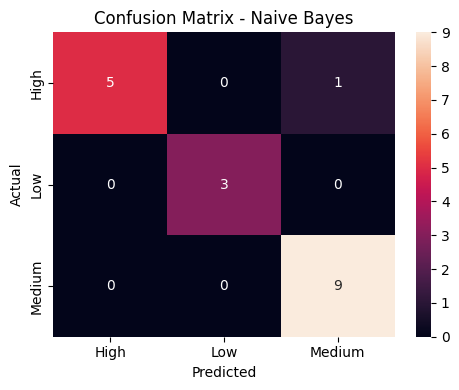


Decision Tree:

              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       0.75      1.00      0.86         3
      Medium       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.88      0.91      0.89        18
weighted avg       0.90      0.89      0.89        18



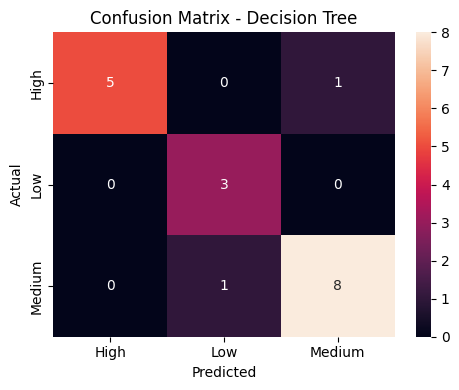

<ipython-input-5-5e5a8becbec7>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="F1 Score", y="Model", palette="viridis")


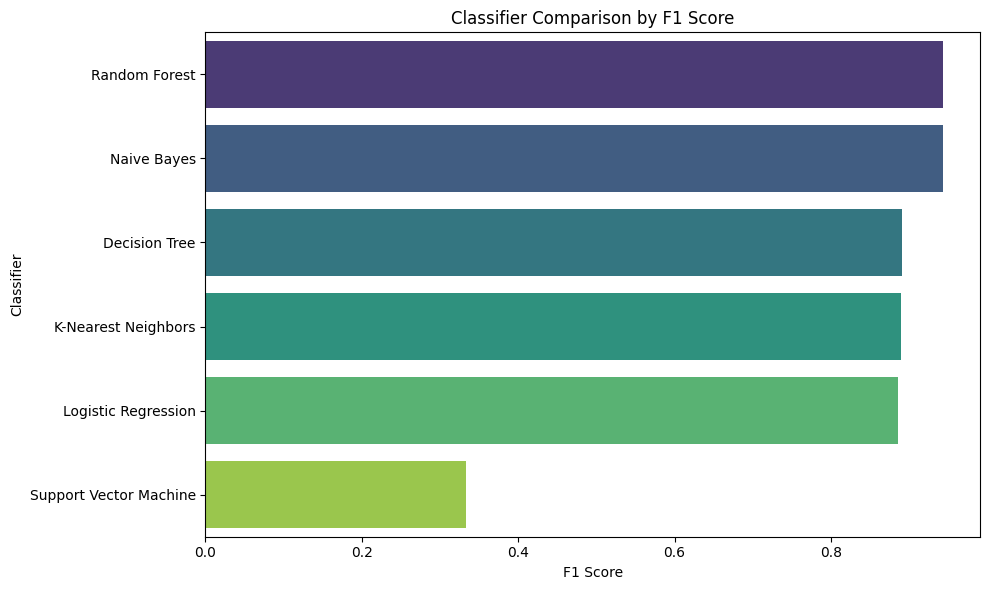

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# --- Feature and Target Selection ---
feature_cols = [
    "Temperature", "RH", "Air Quality PM2.5", "Population Density",
    "Building Density", "Clothing Factor", "Activity Level",
    "DI_1", "DI_2", "DI_3"
]

X = df[feature_cols]
y = df["Risk Class"]

# --- Train-test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Classifier Dictionary ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# --- Evaluation Metrics ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1
    })

    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# --- Summary Plot ---
results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="F1 Score", y="Model", palette="viridis")
plt.title("Classifier Comparison by F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()

##Model Performace

In [ ]:
print(df.columns.tolist())

['Date', 'Location', 'Daily Max Temperature', 'Air Quality PM2.5', 'RH', 'Temperature', 'Building Density', 'Population Density', 'Latitude', 'Longitude', 'Clothing Factor', 'Activity Level', 'DI_1', 'DI_2', 'DI_3', 'Urban Heat Risk Composite', 'Urban Heat Risk', 'Risk Class']


#Training the Dataset and getting predictions for Urban Heat Risk using Random Forest Regressor Model

#Data Visualisations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Let's assume df has a column "Risk Class" with categories: 'Low', 'Medium', 'High'
X = df[['DI_1', 'DI_2', 'DI_3', 'Clothing Factor', 'Activity Level']]  # or whatever features you want
y = df['Risk Class']

# Use stratified split to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Check classes trained on
print("Classes in training data:", y_train.unique())
print("Classes known by the model:", rf_model.classes_)

              precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         3
      Medium       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.97      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18

Classes in training data: ['Medium' 'Low' 'High']
Classes known by the model: ['High' 'Low' 'Medium']


<ipython-input-36-e3bebc1fe5e9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


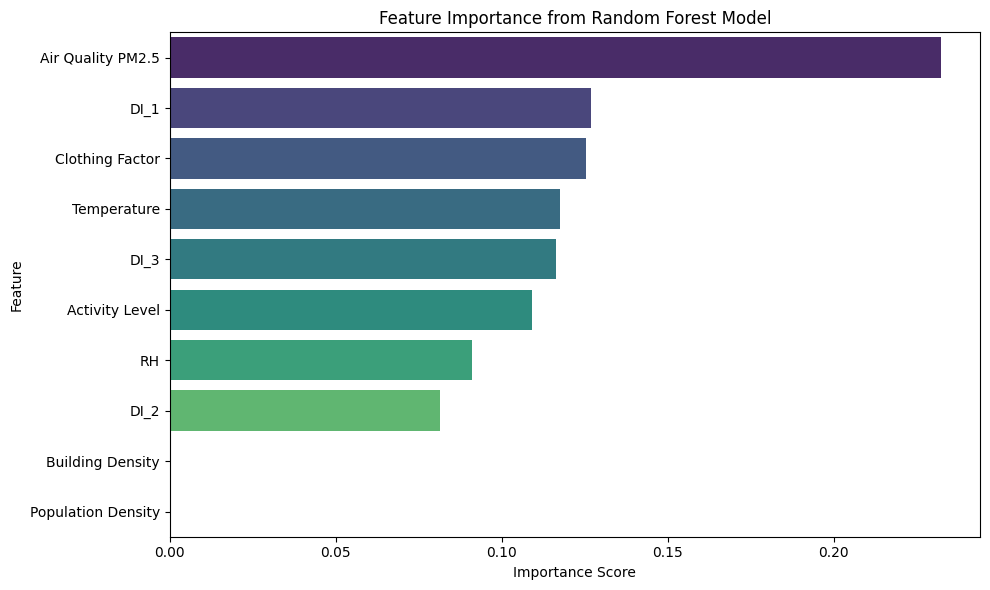

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the trained Random Forest model
importances = clf.feature_importances_
feature_names = feature_cols  # Make sure this matches the model input features

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
print(len(feature_names))
print(len(importances))

14
10


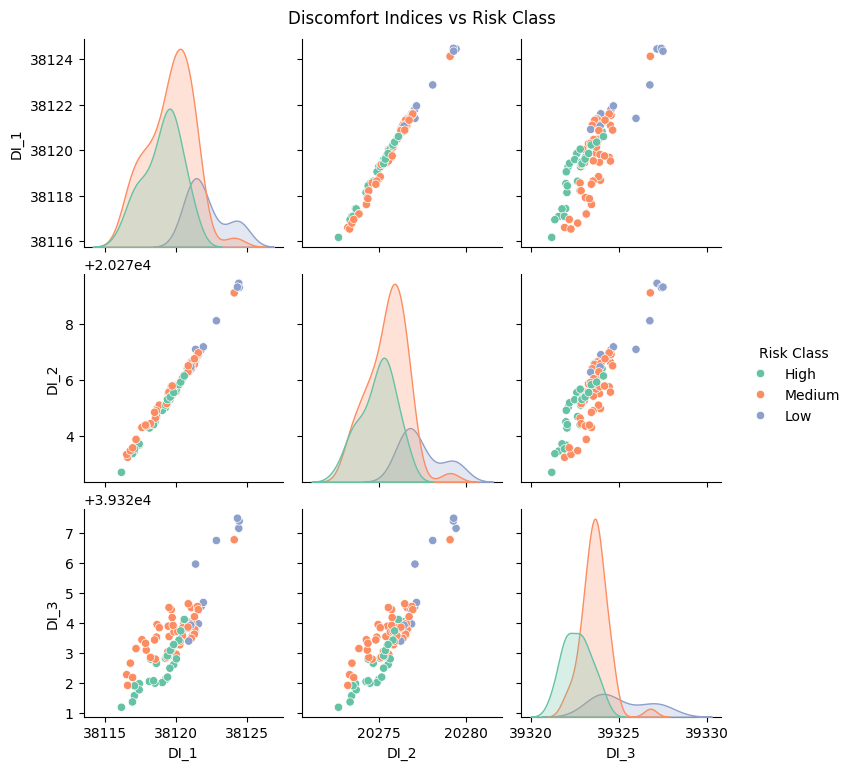

In [ ]:
sns.pairplot(df, vars=["DI_1", "DI_2", "DI_3"], hue="Risk Class", palette='Set2')
plt.suptitle("Discomfort Indices vs Risk Class", y=1.02)
plt.show()


<ipython-input-92-dc505d179c4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, order=rf_model.classes_, palette='Set2')


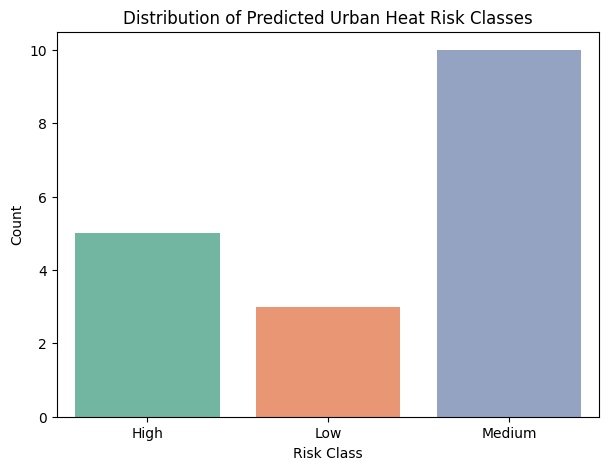

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=y_pred, order=rf_model.classes_, palette='Set2')
plt.title('Distribution of Predicted Urban Heat Risk Classes')
plt.xlabel('Risk Class')
plt.ylabel('Count')
plt.show()

In [ ]:
print(X_train.columns.tolist())

['DI_1', 'DI_2', 'DI_3', 'Clothing Factor', 'Activity Level']


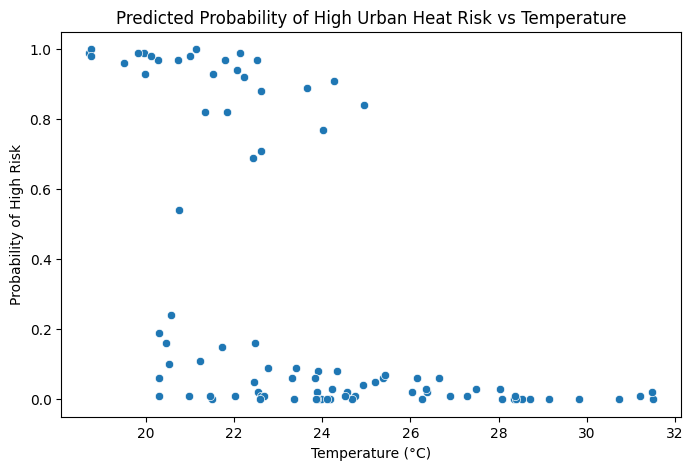

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Temperature'], y=clf.predict_proba(X)[:, clf.classes_.tolist().index('High')])
plt.title('Predicted Probability of High Urban Heat Risk vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability of High Risk')
plt.show()